In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
pd.options.display.max_rows = 500
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')


In [38]:
df=pd.read_csv('complain_Suseong.csv')

In [39]:
df['dept'].unique()

array(['도시국 건설과', '복지국 자원순환과', '도시국 교통과', '도시국 건축과', '문화교육국 체육진흥과',
       '복지국 녹색환경과', '도시국 공원녹지과', '고산3동', '행정국 정보통신과', '문화교육국 교육지원과',
       '기획재정국 일자리경제과', '파동', '황금1동', '도시국 도시디자인과', '두산동', '범어1동', '지산1동',
       '보건소 감염병관리과', '고산1동', '보건소 건강증진과', '중동', '복지국 복지정책과', '청렴감사실',
       '보건소 식품위생과', '행정국 행정지원과', '보건소 보건행정과', '도시국 안전총괄과', '만촌3동',
       '보건소 고산건강생활지원센터', '행정국 홍보소통과', '고산2동', '문화교육국 청년여성가족과',
       '복지국 생활보장과', '문화교육국 문화예술과', '복지국 행복나눔과', '행정국 민원여권과', '상동',
       '기획재정국 토지정보과', '기획재정국 세무1과', '범어2동', '범어4동', '범어3동', '만촌1동',
       '미래경쟁력본부 평생교육과', '복지국 경제환경과', '도시국 토지정보과', '만촌2동', '행정국 문화체육과',
       '홍보소통실', '수성1가동', '교육문화국 문화체육과', '복지국 복지과', '행정국 세무2과', '기획조정실',
       '교육문화국 관광과', '교육문화국 평생교육과', '범물2동', '행정국 세무1과', '황금2동', '지산2동',
       '복지국 생활지원과', '수성2.3가동', '범물1동', '일자리투자사업단', '수성4가동', '복지국 희망복지지원단',
       '의회 의회사무국', '총무국 총무과', '총무국 세무과', '총무국 정보통신팀', '수성아트피아',
       '주민생활지원국 주민생활지원과', '주민생활지원국 산업환경팀', '도시국 재난안전관리팀',
       '주민생활지원국 희망스타트팀', '총무국 자치행정과', '주민생활

In [40]:
df['dept'].value_counts()

도시국 건축과            2348
도시국 교통과            1163
도시국 건설과             903
복지국 녹색환경과           633
도시국 공원녹지과           590
복지국 경제환경과           453
복지국 자원순환과           271
교육문화국 문화체육과         190
도시국 도시디자인과          159
복지국 복지과              96
보건소 보건행정과            75
행정국 문화체육과            57
행정국 행정지원과            47
보건소 식품위생과            47
총무국 총무과              44
보건소 감염병관리과           40
청렴감사실                29
보건소 건강증진과            26
도시국 안전총괄과            25
도시국 토지정보과            24
행정국 민원여권과            23
교육문화국 평생교육과          23
복지국 복지정책과            22
총무국 세무과              20
행정국 홍보소통과            20
문화교육국 체육진흥과          19
총무국 정보통신팀            17
보건소 고산건강생활지원센터       11
지산1동                 11
범어2동                 10
문화교육국 문화예술과           9
복지국 생활지원과             9
만촌2동                  9
황금2동                  8
행정국 세무1과              8
고산2동                  8
기획재정국 일자리경제과          7
주민생활지원국 주민생활지원과       7
기획조정실                 7
총무국 자치행정과             7
행정국 정보통신과             7
고산3동            

In [41]:
#중분류 생성
df['middle category']=df['dept'].copy()

In [42]:
for i in range(0,len(df['middle category'])):
    if '국' in df['middle category'][i]:
        num=df['middle category'][i].find('국')
        df['middle category'][i]=df['middle category'][i][:num+1]
        
    elif '보건소' in df['middle category'][i]:
        df['middle category'][i]='보건소'
        
    elif df['middle category'][i][-1]=='동':
        df['middle category'][i]='동사무소'

In [43]:
df['middle category'].value_counts()

도시국              5213
복지국              1492
교육문화국             214
보건소               199
행정국               167
동사무소              125
총무국                89
문화교육국              36
청렴감사실              29
주민생활지원국            16
기획재정국              16
기획조정실               7
일자리투자사업단            6
수성아트피아              3
의회 의회사무국            2
홍보소통실               1
미래경쟁력본부 평생교육과       1
Name: middle category, dtype: int64

In [44]:
#민원내용 길이
df['len_content']=0
for i in range(0,len(df['len_content'])):
    df['len_content'][i]=len(df['content'][i])

In [45]:
df[['len_content']].describe()

,len_content
count,7616.000000
mean,479.403361
std,514.759417
min,1.000000
25%,204.000000
50%,354.000000
75%,606.000000
max,22716.000000


In [46]:
#이상치 확인
df[df['len_content']<=20]

,title,content,dept,middle category,len_content
608,자가격리 통지서 발급 부탁드립니다,자가 격리 통지서 발급부탁드립니다.,보건소 감염병관리과,보건소,19
629,자가격리 통지서 발급 요청합니다.,격리 통지서가 필요하여 요청드립니다.,보건소 고산건강생활지원센터,보건소,20
1855,수성못 상화공원쪽 잔디에는 텐트 금지인가요?,제목 그대로 여쭤보고 싶네요,도시국 공원녹지과,도시국,15
5243,<목록번호6185번>즉시 처리해 주셔서 감사합니다(이하 내용無),.,도시국 건설과,도시국,1
6106,범어네거리 전광판~~에 Wolcome이라고 뜨네요.welcome이 맞지않나요ㅡ.ㅡ;...,냉무,도시국 도시디자인과,도시국,2
7016,준공승인결사반대,수성태영데시앙 준공승인결사반대합니다,도시국 건축과,도시국,19


In [47]:
#이상치로 판단하기 보단 제목과 내용을 통합하는게 나을 듯!
df['text']=df['title']+" "+df['content']

In [48]:
df.head(10)

,title,content,dept,middle category,len_content,text
0,"범어 우방 1, 2차 공사장 도로 시설물 점검 요청","청구푸른마을에 거주하는 시민입니다.\n\n어제 아이 통학을 위해 우방 1, 2차 공...",도시국 건설과,도시국,411,"범어 우방 1, 2차 공사장 도로 시설물 점검 요청 청구푸른마을에 거주하는 시민입니..."
1,쓰레기 불법 투기자를 신고합니다,만촌동주택가 맞은편 앞집에서 주기적으로 쓰레기 배출을 타인의 주택앞에 침범하여\n불...,복지국 자원순환과,복지국,249,쓰레기 불법 투기자를 신고합니다 만촌동주택가 맞은편 앞집에서 주기적으로 쓰레기 배출...
2,"우방 1,2차 재건축공사 관련 도로 점유 및 주민 통행 방해에 대한 진정","구정에 노고가 많으십니다.\n\n범어 우방 1, 2차 재개발 공사와 관련해 일전에 ...",도시국 건설과,도시국,895,"우방 1,2차 재건축공사 관련 도로 점유 및 주민 통행 방해에 대한 진정 구정에 노..."
3,파동 KCC건설현장앞 이중주차,파동kcc건설현장 앞 이중주차로 인한\n불편사항 접수합니다\n\n민원을 몇차례 넣었...,도시국 교통과,도시국,285,파동 KCC건설현장앞 이중주차 파동kcc건설현장 앞 이중주차로 인한\n불편사항 접수...
4,지범로 52길 5-6 더트루웰수성아파트 주변 주정차 단속,저는 해당 주소 3층에 거주하고 있는 박신호라고 합니다. 본 건물은 20년 이전 부...,도시국 교통과,도시국,678,지범로 52길 5-6 더트루웰수성아파트 주변 주정차 단속 저는 해당 주소 3층에 거...
5,"범어 우방 1,2차 공사 관련 민원 및 민원 답변에 대한 의견 개진",구정에 노고가 많으십니다.\n\n저는 3월 29일 민원 제기한 범어청구푸른마을에 거...,도시국 건축과,도시국,1285,"범어 우방 1,2차 공사 관련 민원 및 민원 답변에 대한 의견 개진 구정에 노고가 ..."
6,(체육진흥과) 수성패밀리파크 풋살장 전등 교체 요청,수성패밀리파크 풋살장 전등 일부가 나오지 않아서\n야간 운동 시 사고 위험이 있습니...,문화교육국 체육진흥과,문화교육국,64,(체육진흥과) 수성패밀리파크 풋살장 전등 교체 요청 수성패밀리파크 풋살장 전등 일부...
7,입주자대표회장이 선거관리위원회 업무를 방해하고 있습니다.,2023년 4월 1일 선거관리위원 임기가 시작하여 관리주체에 총 7명의 선관위원 중...,도시국 건축과,도시국,417,입주자대표회장이 선거관리위원회 업무를 방해하고 있습니다. 2023년 4월 1일 선거...
8,하수구 악취 확인 및 처리 요청 건,"수고하십니다\n\n하수구 악취가 심합니다\n작년, 재 작년 지속 악취가 났었고, 날...",도시국 건설과,도시국,220,하수구 악취 확인 및 처리 요청 건 수고하십니다\n\n하수구 악취가 심합니다\n작년...
9,"범어우방 1, 2차 공사 관련 민원(소음 및 초등학생 통학로 개선 요청)",구정에 노고가 많으십니다.\n\n일전에 민원을 제기한 청구푸른마을에 거주하고 있는 ...,복지국 녹색환경과,복지국,1097,"범어우방 1, 2차 공사 관련 민원(소음 및 초등학생 통학로 개선 요청) 구정에 노..."


In [49]:
#데이터 프레임 정리
df=df[['text','len_content','middle category','dept']]

In [50]:
df.head(10)

,text,len_content,middle category,dept
0,"범어 우방 1, 2차 공사장 도로 시설물 점검 요청 청구푸른마을에 거주하는 시민입니...",411,도시국,도시국 건설과
1,쓰레기 불법 투기자를 신고합니다 만촌동주택가 맞은편 앞집에서 주기적으로 쓰레기 배출...,249,복지국,복지국 자원순환과
2,"우방 1,2차 재건축공사 관련 도로 점유 및 주민 통행 방해에 대한 진정 구정에 노...",895,도시국,도시국 건설과
3,파동 KCC건설현장앞 이중주차 파동kcc건설현장 앞 이중주차로 인한\n불편사항 접수...,285,도시국,도시국 교통과
4,지범로 52길 5-6 더트루웰수성아파트 주변 주정차 단속 저는 해당 주소 3층에 거...,678,도시국,도시국 교통과
5,"범어 우방 1,2차 공사 관련 민원 및 민원 답변에 대한 의견 개진 구정에 노고가 ...",1285,도시국,도시국 건축과
6,(체육진흥과) 수성패밀리파크 풋살장 전등 교체 요청 수성패밀리파크 풋살장 전등 일부...,64,문화교육국,문화교육국 체육진흥과
7,입주자대표회장이 선거관리위원회 업무를 방해하고 있습니다. 2023년 4월 1일 선거...,417,도시국,도시국 건축과
8,하수구 악취 확인 및 처리 요청 건 수고하십니다\n\n하수구 악취가 심합니다\n작년...,220,도시국,도시국 건설과
9,"범어우방 1, 2차 공사 관련 민원(소음 및 초등학생 통학로 개선 요청) 구정에 노...",1097,복지국,복지국 녹색환경과


In [51]:
#결측치 확인
df.isnull().sum()

text               0
len_content        0
middle category    0
dept               0
dtype: int64

<AxesSubplot:xlabel='middle category', ylabel='len_content'>

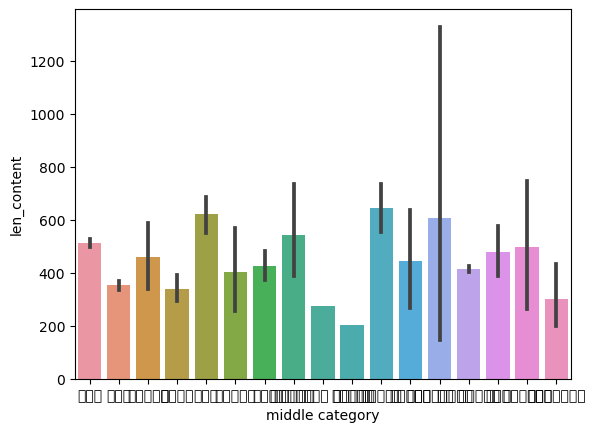

In [52]:
#혹시 부서별로 민원 길이가 다르려나?
sns.barplot(data=df,x='middle category',y='len_content')
plt.show()
#아 폰트 깨짐..... 그래도 유의미해 보이지는 않는다!

In [53]:
#중복텍스트 제거
tmp_list=[]
for i in range(0,len(df['text'])):
    if df['text'][i] in tmp_list:
        df['text'][i]=None
    else:
        tmp_list.append(df['text'][i])

In [54]:
df.isnull().sum()

text               390
len_content          0
middle category      0
dept                 0
dtype: int64

In [55]:
df=df.dropna()

In [56]:
df.isnull().sum()

text               0
len_content        0
middle category    0
dept               0
dtype: int64

In [59]:
#맞춤법 검사전 개행문자,이모티콘,특수기호,숫자 제거
#불용어 사전
stop_words='''1 2 3 4 5 6 7 8 9 ! ? . / ~ @ # $ % ^ & * _ \n ㅡㅡ ㅜㅜ ^^  ㅋ ㅋㅋ  ㅋㅋㅋ ㅋㅋㅋㅋ ㅋㅋㅋㅋㅋ ㅋㅋㅋㅋㅋㅋㅋ '''
stop_words=stop_words.split(' ')

#불용어 제거
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize 

for idx, sentence in enumerate(df['text']) :
  word_tokens = word_tokenize(sentence)
  result=[]
  for w in word_tokens: 
    if w not in stop_words: 
        result.append(w) 
    df['text'][idx] = " ".join(result)  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

KeyboardInterrupt: 

In [3]:
df=pd.read_csv('C:/Users/User/Desktop/suseong_remove.csv')

In [4]:
#맞춤법 교정
!pip install py-hanspell

In [5]:
from hanspell import spell_checker
import requests

In [6]:
result = spell_checker.check(u'안녕 하세요. 저는 한국인 입니다. 이문장은 한글로 작성됬습니다.')
result

Checked(result=True, original='안녕 하세요. 저는 한국인 입니다. 이문장은 한글로 작성됬습니다.', checked='안녕하세요. 저는 한국인입니다. 이 문장은 한글로 작성됐습니다.', errors=4, words=OrderedDict([('안녕하세요.', 2), ('저는', 0), ('한국인입니다.', 2), ('이', 2), ('문장은', 2), ('한글로', 0), ('작성됐습니다.', 1)]), time=0.12649941444396973)

In [8]:
result.as_dict()['checked']

'안녕하세요. 저는 한국인입니다. 이 문장은 한글로 작성됐습니다.'

In [9]:
result[2]

'안녕하세요. 저는 한국인입니다. 이 문장은 한글로 작성됐습니다.'

In [10]:
error_list=[]
for i in range(0,len(df['text'])):
    try:
        df['text'][i]=spell_checker.check(df['text'][i]).as_dict()['checked']
    except:
        error_list.append(i)
        continue

In [11]:
error_list

[]

In [12]:
df.iloc[error_list]

,Unnamed: 0,text,len_content,middle category,dept


In [15]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [16]:
df.head(10)

,text,len_content,middle category,dept
0,"범어 우방, 2차 공사장 도로 시설물 점검 요청 청구 푸른 마을에 거주하는 시민입니...",411,도시국,도시국 건설과
1,쓰레기 불법 투기자를 신고합니다 만촌동 주택가 맞은편 앞집에서 주기적으로 쓰레기 배...,249,복지국,복지국 자원순환과
2,,895,도시국,도시국 건설과
3,파동 KCC건설 현장 앞 이중주차 파동 kcc건설 현장 앞 이중주차로 인한 불편사항...,285,도시국,도시국 교통과
4,,678,도시국,도시국 교통과
5,,1285,도시국,도시국 건축과
6,( 체육 진흥과 ) 수 성 패밀리파크 풋살장 전등 교체 요청 수 성 패밀리파크 풋살...,64,문화교육국,문화교육국 체육진흥과
7,입주자 대표회장이 선거관리위원회 업무를 방해하고 있습니다 2023년 4월 1일 선거...,417,도시국,도시국 건축과
8,"하수구 악취 확인 및 처리 요청 건 수고하십니다 하수구 악취가 심합니다 작년, 재 ...",220,도시국,도시국 건설과
9,,1097,복지국,복지국 녹색환경과


In [33]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [34]:
df.to_csv('C:/Users/User/Desktop/suseong_remove_Spelling.csv', index=False)

In [35]:
df=pd.read_csv('C:/Users/User/Desktop/suseong_remove_Spelling.csv')

In [36]:
df.head(10)

,text,len_content,middle category,dept
0,"범어 우방, 2차 공사장 도로 시설물 점검 요청 청구 푸른 마을에 거주하는 시민입니...",411,도시국,도시국 건설과
1,쓰레기 불법 투기자를 신고합니다 만촌동 주택가 맞은편 앞집에서 주기적으로 쓰레기 배...,249,복지국,복지국 자원순환과
2,NaN,895,도시국,도시국 건설과
3,파동 KCC건설 현장 앞 이중주차 파동 kcc건설 현장 앞 이중주차로 인한 불편사항...,285,도시국,도시국 교통과
4,NaN,678,도시국,도시국 교통과
5,NaN,1285,도시국,도시국 건축과
6,( 체육 진흥과 ) 수 성 패밀리파크 풋살장 전등 교체 요청 수 성 패밀리파크 풋살...,64,문화교육국,문화교육국 체육진흥과
7,입주자 대표회장이 선거관리위원회 업무를 방해하고 있습니다 2023년 4월 1일 선거...,417,도시국,도시국 건축과
8,"하수구 악취 확인 및 처리 요청 건 수고하십니다 하수구 악취가 심합니다 작년, 재 ...",220,도시국,도시국 건설과
9,NaN,1097,복지국,복지국 녹색환경과
